# Measuring Customer Satisfaction and Sentiment Analysis



## Data Preparation

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

Read Dataset[link text](https://www.kaggle.com/datasets/khushipitroda/airline-reviews)

In [54]:
df_review = pd.read_csv('Airline_Reviews.csv')
pd.set_option("display.max_columns", None) # show all columns
pd.set_option("display.max_rows", None) # show all rows
# df- > untuk rekayasa fitur sebelum Machine Learning
# data- > untuk proses EDA

In [55]:
df_review.head()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [56]:
df_review.shape

(23171, 20)

In [57]:
# sample 5 rows of the data
# the results change everytime the code is executed (random sample)
df_review.sample(5)

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
5884,5884,Boutique Air,1,"""I need my luggage""",6th August 2022,True,I paid for a flight from Atlanta GA to Carlsb...,NaN,Family Leisure,Economy Class,Atlanta to Dallas Fort-Worth via Carlsbad,August 2022,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
5270,5270,Bahamasair,1,Bahamasair customer review,24th February 2011,False,Miami-Nassau-Havana. Check in at Miami couldn'...,NaN,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,no
2384,2384,Air Moldova,5,Air Moldova customer review,16th June 2014,False,STN-KIV-STN by Airbus 320. Flight was over two...,NaN,NaN,Economy Class,NaN,NaN,1.0,3.0,2.0,NaN,1.0,NaN,3.0,no
21243,21243,Turkish Airlines,1,"""Service and decency not present""",7th January 2023,False,"So far, I have never had such a bad experienc...",NaN,Family Leisure,Economy Class,Delhi to Stuttgart via Istanbul,January 2023,2.0,3.0,3.0,2.0,2.0,1.0,3.0,no
14205,14205,Luxair,9,"""we got a decent deal""",18th October 2016,False,Excellent airline who always treat customers...,Bombardier Dash-8,Couple Leisure,Economy Class,DUB to LUX,December 2015,5.0,4.0,5.0,4.0,NaN,NaN,3.0,yes


# Tipe Data

In [58]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

Data insight :

- Ukuran Dataset: Terdiri dari 23,171 baris dan 20 kolom.

- Tipe Data & Nilai Kosong:

1. Tipe data campuran — int64 (1), bool (1), object (11), dan float64 (7).

- Beberapa kolom memiliki banyak nilai kosong:

1. Aircraft (31% terisi), Wifi & Connectivity (25.5% terisi), Inflight Entertainment (47% terisi), dan Food & Beverages (62.5% terisi).
Kolom seperti Airline Name, Overall_Rating, dan Review Date sepenuhnya terisi.

- Potensi Masalah Data:
1. Unnamed: 0 sebaiknya dihapus karena mungkin merupakan indeks.

2. Overall_Rating dan Recommended perlu dikonversi ke tipe numerik dan boolean.

3. Review Date dan Date Flown perlu diubah ke format datetime.

- Informasi Kolom Teks:

1. Review dan Review Title dapat digunakan untuk sentiment analysis.

2. Type of Traveller dan Seat Type membantu segmentasi pelanggan.

- Insight Awal:

1. Hubungan antara Overall_Rating dan skor layanan (Seat Comfort, Cabin Staff Service, dll.).

2. Analisis perbedaan review pelanggan yang Verified dan tidak.

3. Hubungan jenis traveler dengan preferensi kursi dan Value for Money.

4. Sentimen teks review untuk menilai persepsi pelanggan terhadap maskapai.

In [59]:
df_review.rename(columns={'Unnamed: 0': 'Id_survey'}, inplace=True)


In [60]:
# Mengonversi Overall_Rating menjadi numerik, menangani error dengan NaN
df_review['Overall_Rating'] = pd.to_numeric(df_review['Overall_Rating'], errors='coerce')

# Memeriksa tipe data terbaru
print(df_review.dtypes)



Id_survey                   int64
Airline Name               object
Overall_Rating            float64
Review_Title               object
Review Date                object
Verified                     bool
Review                     object
Aircraft                   object
Type Of Traveller          object
Seat Type                  object
Route                      object
Date Flown                 object
Seat Comfort              float64
Cabin Staff Service       float64
Food & Beverages          float64
Ground Service            float64
Inflight Entertainment    float64
Wifi & Connectivity       float64
Value For Money           float64
Recommended                object
dtype: object


In [61]:
# Mengubah kolom 'Review Date' dan 'Date Flown' menjadi datetime
df_review['Review Date'] = pd.to_datetime(df_review['Review Date'], errors='coerce')
df_review['Date Flown'] = pd.to_datetime(df_review['Date Flown'], errors='coerce')

print(df_review.dtypes)


Id_survey                          int64
Airline Name                      object
Overall_Rating                   float64
Review_Title                      object
Review Date               datetime64[ns]
Verified                            bool
Review                            object
Aircraft                          object
Type Of Traveller                 object
Seat Type                         object
Route                             object
Date Flown                datetime64[ns]
Seat Comfort                     float64
Cabin Staff Service              float64
Food & Beverages                 float64
Ground Service                   float64
Inflight Entertainment           float64
Wifi & Connectivity              float64
Value For Money                  float64
Recommended                       object
dtype: object


<ipython-input-61-8070fd5956db>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_review['Date Flown'] = pd.to_datetime(df_review['Date Flown'], errors='coerce')


In [62]:
# Memisahkan kolom numerikal dan kategorikal
numerical_columns = df_review.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df_review.select_dtypes(include=['object']).columns.tolist()
boolean_columns = df_review.select_dtypes(include=['bool']).columns.tolist()

# Menampilkan hasil
print("Kolom Numerikal:", numerical_columns)
print("Kolom Kategorikal:", categorical_columns)
print("Kolom Boolean:", boolean_columns)

Kolom Numerikal: ['Id_survey', 'Overall_Rating', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money']
Kolom Kategorikal: ['Airline Name', 'Review_Title', 'Review', 'Aircraft', 'Type Of Traveller', 'Seat Type', 'Route', 'Recommended']
Kolom Boolean: ['Verified']


In [63]:
df_review.head()

,Id_survey,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9.0,"""pretty decent airline""",2019-11-11,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,2019-11-01,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1.0,"""Not a good airline""",2019-06-25,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,2019-06-01,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1.0,"""flight was fortunately short""",2019-06-25,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,2019-06-01,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1.0,"""I will never fly again with Adria""",2019-09-28,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,2019-09-01,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,4,Adria Airways,1.0,"""it ruined our last days of holidays""",2019-09-24,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,2019-09-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [64]:
# Define the Numericals variable as a list of column names
Numericals = ['Overall_Rating', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money']

# Syntax numerical statistical sumary
df_review[Numericals].describe()

,Overall_Rating,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money
count,22329.000000,19016.000000,18911.000000,14500.000000,18378.000000,10829.000000,5920.000000,22105.000000
mean,3.144297,2.618321,2.871609,2.553586,2.353738,2.178964,1.780405,2.451120
std,2.879391,1.464844,1.604631,1.526314,1.595747,1.488758,1.318800,1.594125
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000
75%,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000
max,9.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Berdasarkan deskriptif statistik yang disajikan untuk kolom rating layanan dalam dataset review maskapai, berikut beberapa insight yang dapat diperoleh:

1. Skor Overall_Rating (Keseluruhan)
Mean: 3.14 menunjukkan bahwa rata-rata rating keseluruhan maskapai berada di kategori menengah.
Std (Standard Deviation): 2.88 menunjukkan variasi yang tinggi, mencerminkan beragam pengalaman pelanggan.
Min-Max: Nilai minimum 1 dan maksimum 9, menunjukkan skala penilaian lebih tinggi dibandingkan kolom lainnya (kemungkinan skala berbeda atau ada kesalahan input).
Insight: Perlu investigasi apakah nilai maksimum 9 merupakan anomali data.
2. Seat Comfort
Mean: 2.62 dari skala maksimum 5, menunjukkan kenyamanan kursi dinilai rendah hingga sedang oleh pelanggan.
0 Sebagai Nilai Minimum: Ini bisa menjadi kesalahan input (missing value yang dikodekan sebagai 0) atau perluasan skala.
3. Cabin Staff Service
Mean: 2.87, mendekati kategori sedang.
Std: 1.60 menunjukkan variasi cukup tinggi dalam pengalaman dengan layanan awak kabin.
4. Food & Beverages
Mean: 2.55 dengan Std 1.53, menunjukkan pengalaman yang beragam, dengan beberapa pelanggan mungkin mengalami ketidakpuasan.
5. Ground Service
Mean: 2.35 dengan persebaran tinggi (Std 1.59), menunjukkan layanan di darat juga memiliki banyak keluhan atau variasi.
6. Inflight Entertainment dan Wifi & Connectivity
Kedua aspek ini memiliki mean yang relatif rendah:
Inflight Entertainment: 2.17
Wifi & Connectivity: 1.78
Insight: Layanan hiburan dan konektivitas dianggap paling tidak memuaskan, dengan skor rata-rata di bawah 2, yang menunjukkan area perbaikan penting.
7. Value for Money
Mean: 2.45 dari skala 5.
Insight: Pelanggan merasa harga tiket tidak sepadan dengan kualitas layanan yang diterima.
Pola Distribusi
Kolom memiliki banyak nilai minimum 0 atau 1 pada kuartil ke-25 (Q1). Ini bisa mengindikasikan bahwa sebagian besar review memberikan skor rendah.

In [65]:
# Define the Categoricals variable as a list of column names
Categoricals =  ['Airline Name', 'Review_Title', 'Review', 'Aircraft', 'Type Of Traveller', 'Seat Type', 'Route', 'Recommended']

# Syntax numerical statistical sumary
df_review[Categoricals].describe()

,Airline Name,Review_Title,Review,Aircraft,Type Of Traveller,Seat Type,Route,Recommended
count,23171,23171,23171,7129,19433,22075,19343,23171
unique,497,17219,23046,1048,4,4,13607,2
top,Caribbean Airlines,Onur Air customer review,I spend at least the half of my time during a ...,A320,Solo Leisure,Economy Class,Melbourne to Sydney,no
freq,100,84,2,1041,7120,19145,43,15364


Berdasarkan statistik deskriptif dari kolom kategori dalam dataset review maskapai, berikut adalah insight yang bisa diambil:

1. Airline Name
Jumlah Maskapai Unik: 497 maskapai.
Maskapai Paling Banyak Direview: Caribbean Airlines, dengan 100 review.
Insight: Caribbean Airlines memiliki jumlah ulasan terbanyak, yang bisa mencerminkan popularitas atau pengalaman penumpang yang sangat bervariasi (positif atau negatif) sehingga mendorong lebih banyak ulasan.
2. Review_Title dan Review
Judul Review Unik: 17.219 judul unik dari 23.171 total review.
Teks Review Unik: 23.046 dari 23.171 review (hampir semua ulasan unik).
Insight: Judul ulasan cenderung tidak sepenuhnya unik, tetapi sebagian besar teks ulasan memberikan pandangan berbeda dari setiap pelanggan. Ini merupakan sumber yang kaya untuk sentiment analysis menggunakan NLP.
3. Aircraft
Jumlah Tipe Pesawat yang Disebutkan: 1.048 tipe, dengan pesawat A320 paling sering disebut sebanyak 1.041 kali.
Insight: Pesawat A320 sering diulas, kemungkinan karena ini adalah model pesawat yang banyak digunakan di berbagai maskapai. Analisis lebih lanjut dapat dilakukan untuk mengetahui apakah ada korelasi antara jenis pesawat dan pengalaman penumpang.
4. Type of Traveller
Jenis Pelancong yang Tercatat: 4 kategori, dengan Solo Leisure paling banyak sebanyak 7.120.
Insight: Penumpang dengan tujuan rekreasi (Solo Leisure) merupakan segmen terbesar yang memberikan ulasan, memberikan peluang untuk analisis segmentasi lebih lanjut dalam hal kepuasan layanan.
5. Seat Type
Tipe Kursi yang Diulas: 4 kategori, dengan Economy Class menjadi yang paling sering diulas sebanyak 19.145.
Insight: Fokus utama ulasan berasal dari penumpang Economy Class, sehingga pengalaman di kelas ekonomi menjadi penting untuk perbaikan layanan.
6. Route
Rute yang Diulas: 13.607 rute unik.
Rute Paling Sering Diulas: Melbourne to Sydney, dengan 43 ulasan.
Insight: Melbourne ke Sydney adalah rute dengan ulasan terbanyak. Rute-rute populer dapat dianalisis lebih lanjut untuk mengidentifikasi tantangan atau tren layanan spesifik pada rute tersebut.
7. Recommended
Dua Kategori Nilai (Yes/No): Kolom ini memiliki distribusi dengan no sebagai nilai yang paling sering muncul (15.364).
Insight: Sebagian besar ulasan tidak merekomendasikan maskapai tersebut. Ini dapat memengaruhi citra maskapai dan mencerminkan potensi masalah layanan yang perlu diperbaiki.

# Feature Engineering / Data Cleaning / Data Manipulation

1. Duplicate Handling
Memastikan kembali Data sudah clean atau belum




---



In [66]:
len(df_review.drop_duplicates()) / len(df_review)

1.0

tidak ada data yang duplicates

In [67]:
# Identifying Missing value
df_review.isna().sum()

,0
Id_survey,0
Airline Name,0
Overall_Rating,842
Review_Title,0
Review Date,5113
Verified,0
Review,0
Aircraft,16042
Type Of Traveller,3738
Seat Type,1096


Identifikasi Proporsi Missing Values

In [68]:
missing_percentage = df_review.isnull().sum() / len(df_review) * 100
print(missing_percentage)

Id_survey                  0.000000
Airline Name               0.000000
Overall_Rating             3.633853
Review_Title               0.000000
Review Date               22.066376
Verified                   0.000000
Review                     0.000000
Aircraft                  69.233093
Type Of Traveller         16.132234
Seat Type                  4.730050
Route                     16.520651
Date Flown                16.201286
Seat Comfort              17.931898
Cabin Staff Service       18.385050
Food & Beverages          37.421777
Ground Service            20.685339
Inflight Entertainment    53.264857
Wifi & Connectivity       74.450822
Value For Money            4.600578
Recommended                0.000000
dtype: float64


In [69]:
df_review.dropna(inplace=True)

In [70]:
df_review.isna().sum()

,0
Id_survey,0
Airline Name,0
Overall_Rating,0
Review_Title,0
Review Date,0
Verified,0
Review,0
Aircraft,0
Type Of Traveller,0
Seat Type,0


# Outlier Handling

In [71]:
import scipy.stats as stats

def check_plot(df_review, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df_review[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df_review[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df_review[variable])
    plt.title('Boxplot')

    plt.show()

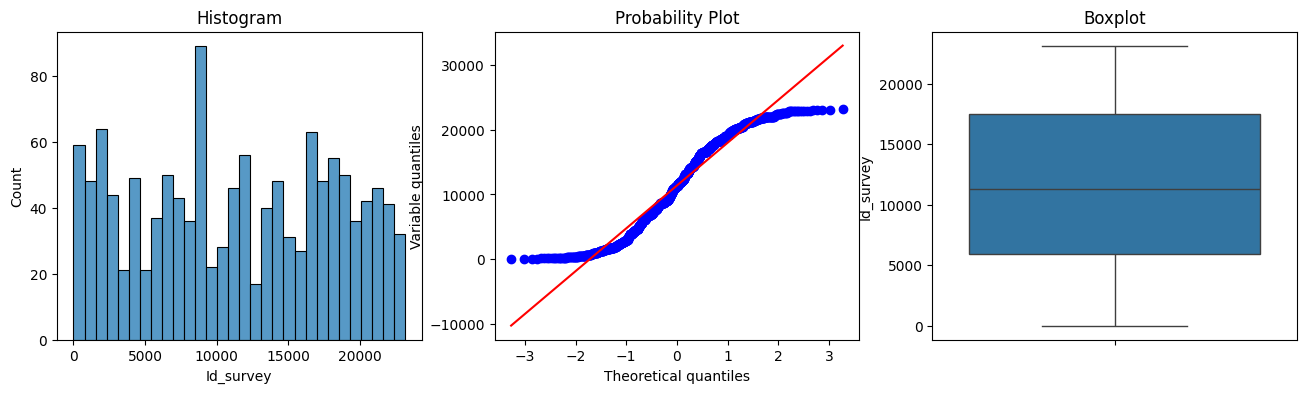

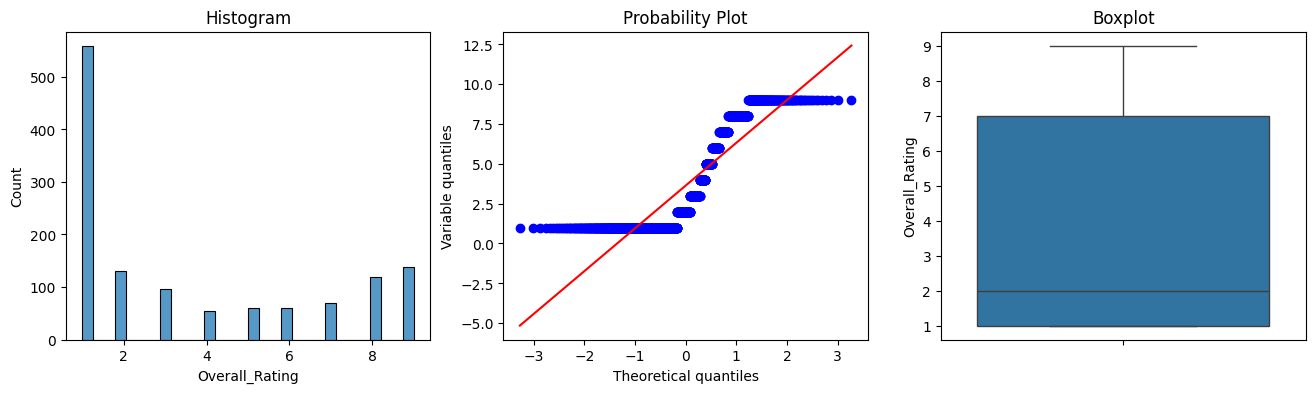

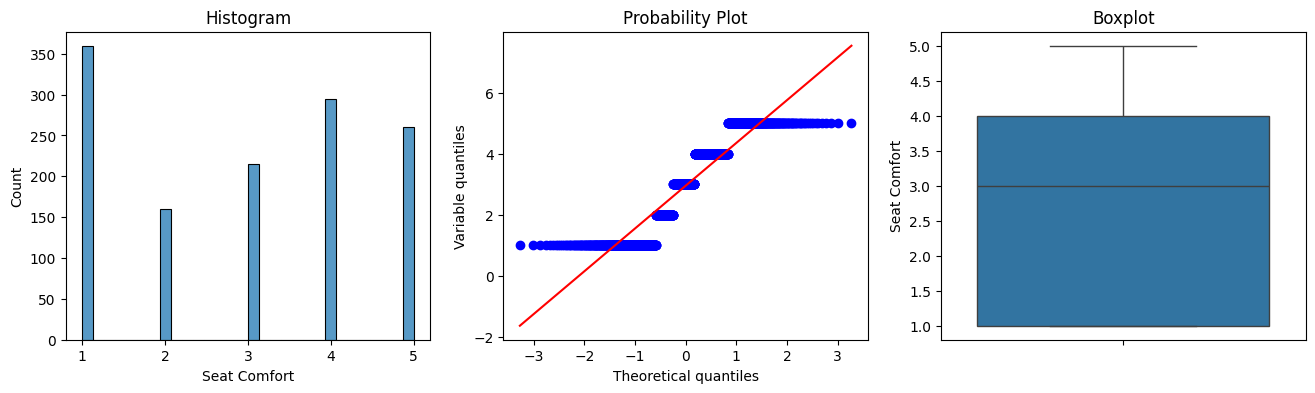

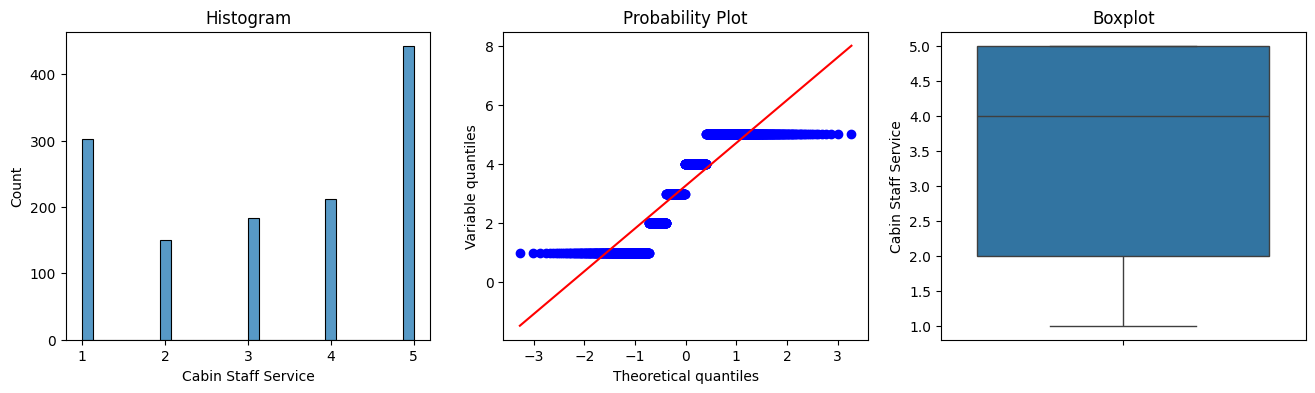

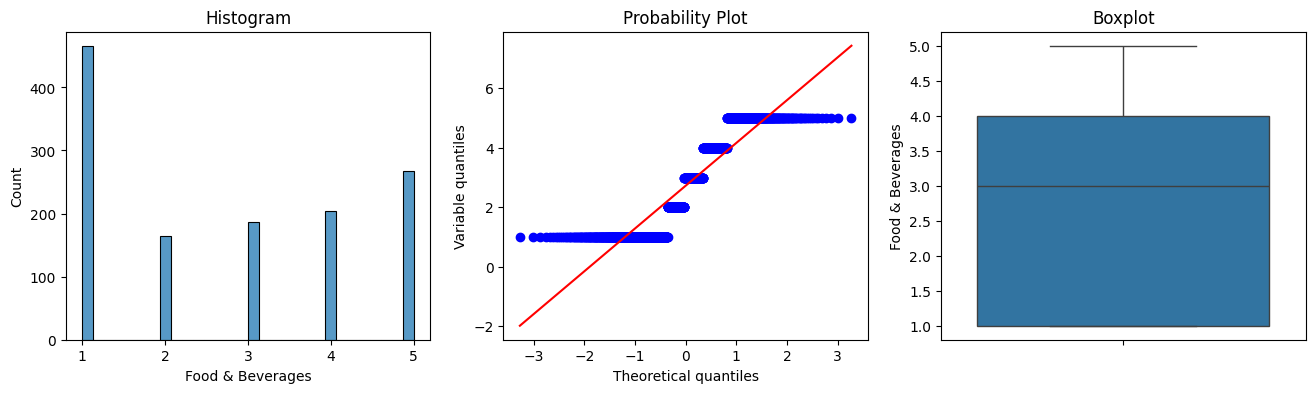

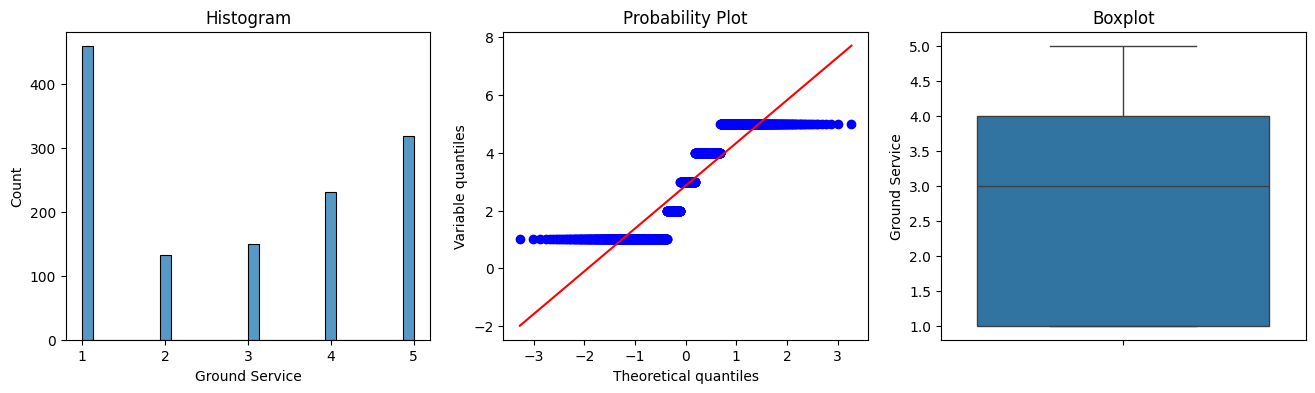

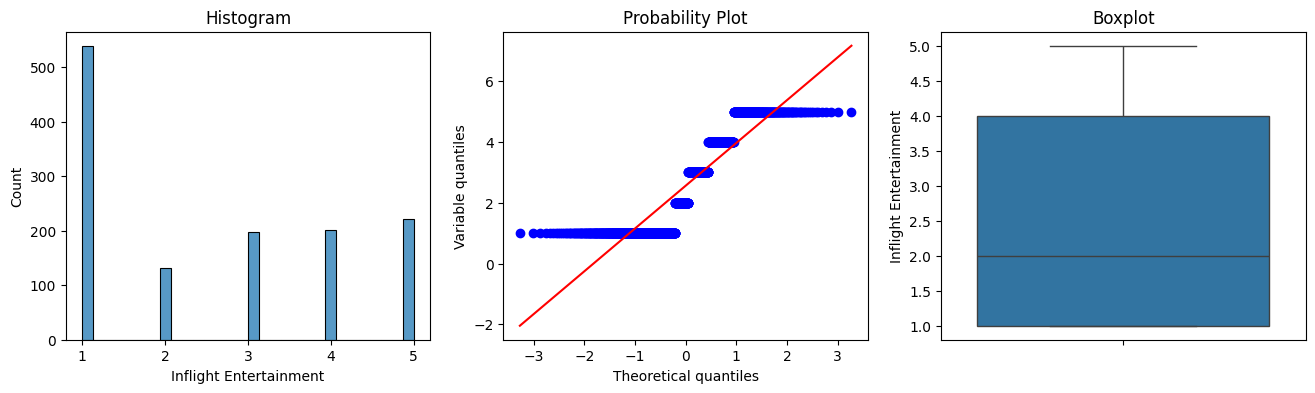

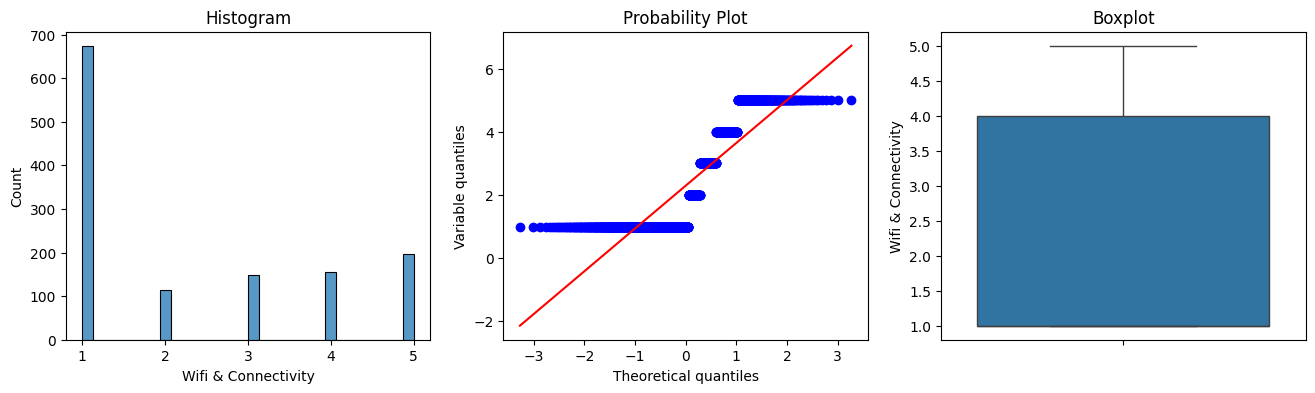

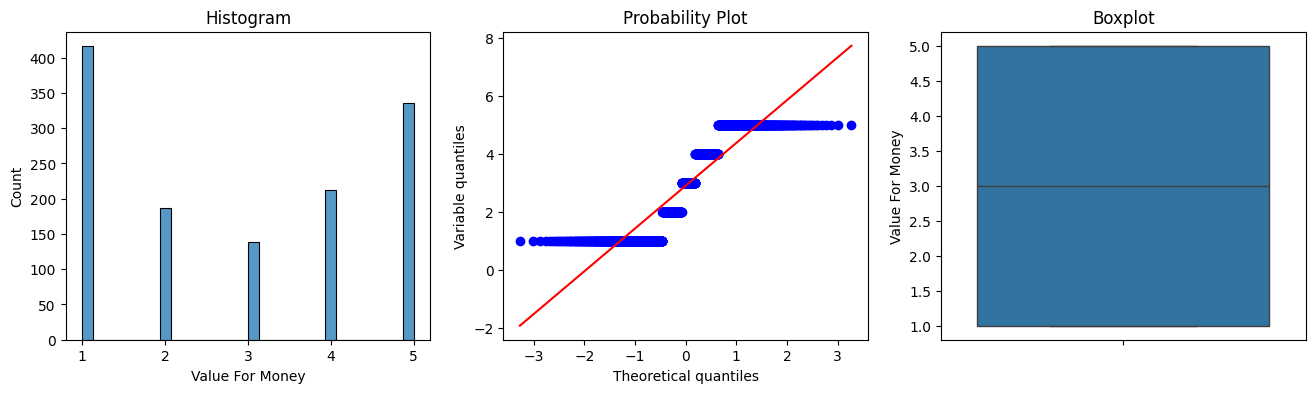

In [72]:
# Memvisualisasikan outlier hanya pada kolom numerik
numeric_columns = df_review.select_dtypes(include=['number']).columns
for col in numeric_columns:
    check_plot(df_review, col)

In [73]:
# Daftar kolom yang dipilih untuk analisis
selected_columns = ['Id_survey', 'Airline Name','Review Date', 'Type Of Traveller', 'Seat Type', 'Review', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money', 'Overall_Rating', 'Recommended' ]

# Membuat dataset baru hanya dengan kolom yang dipilih
df_analysis_review = df_review[selected_columns]


In [74]:
df_analysis_review.head()

,Id_survey,Airline Name,Review Date,Type Of Traveller,Seat Type,Review,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Overall_Rating,Recommended
5,5,Adria Airways,2019-09-17,Couple Leisure,Economy Class,Had very bad experience with rerouted and ca...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no
7,7,Adria Airways,2019-08-24,Solo Leisure,Economy Class,"First of all, I am not complaining about a s...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no
22,22,Adria Airways,2017-01-27,Solo Leisure,Business Class,Ljubljana to Vienna. After a fast boarding p...,5.0,5.0,4.0,5.0,5.0,5.0,4.0,8.0,yes
29,29,Adria Airways,2016-09-04,Family Leisure,Economy Class,Booked this flight after many years using Easy...,2.0,4.0,3.0,3.0,4.0,4.0,4.0,6.0,yes
113,113,Aegean Airlines,2023-04-26,Solo Leisure,Economy Class,Aegean Airlines will remain always my first ...,5.0,5.0,5.0,5.0,3.0,4.0,5.0,1.0,yes


In [75]:
df_analysis_review.shape

(1289, 15)

# Survey Analysis

"Response Rate" adalah metrik yang digunakan untuk mengukur persentase pelanggan yang telah mengisi survei dibandingkan dengan total jumlah pelanggan yang diundang atau memiliki kesempatan untuk memberikan umpan balik. Dalam konteks kalimat tersebut:

Overall_Rating is not blank berarti bahwa pelanggan yang telah memberikan rating atau skor di kolom Overall_Rating dianggap sudah mengisi survei, dan data mereka dapat digunakan dalam analisis.
Response Rate dihitung berdasarkan jumlah entri di mana kolom Overall_Rating memiliki nilai (tidak kosong), dibagi dengan total jumlah entri dalam dataset.

In [76]:
# How many customer responded to the survey?
df_analysis_review['fill_survey'] = np.where(df_analysis_review['Overall_Rating'].isnull(), 'Not Responded', 'Responded')
df_analysis_review.value_counts('fill_survey', normalize = True)

<ipython-input-76-f878f9ab5a97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis_review['fill_survey'] = np.where(df_analysis_review['Overall_Rating'].isnull(), 'Not Responded', 'Responded')


,proportion
fill_survey,
Responded,1.0


Now we will measure the customer's overall satisfaction score (CSAT) with the following formula:

$$
Overall\ CSAT = \frac{\Sigma\ total\ satisfaction\ score}{number\ of\ responded\ customer \times \max\ rating}
$$

The max rating is inserted to convert the CSAT score into percentage. In the dataset, the max rating is 10 since the scale is from 1 to 10.

In [77]:
# Add the 'fill_survey' column to df_analysis_review
df_analysis_review['fill_survey'] = df_analysis_review['fill_survey']

<ipython-input-77-b1e9825bd22b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis_review['fill_survey'] = df_analysis_review['fill_survey']


In [78]:
# Responded Customer
responded_customer = df_analysis_review[ df_analysis_review['fill_survey'] == 'Responded'].copy()
max_rating = 10

csat_score_overall = responded_customer['Overall_Rating'].sum()/ (responded_customer.shape[0] * max_rating)

print(f'Overall CSAT Score: { (csat_score_overall * 100):.1f}')

Overall CSAT Score: 36.3


You can also calculate CSAT as the percentage of satisfied customer, with rating of 9-10 indicate that they are satisfied.

$$
Positive\ CSAT = \frac{number\ of\ satisfied\ customer}{number\ of\ responded\ customer}
$$

Both metrics are valid but they show different meaning. The overall CSAT shows the average satisfaction level of all customer while the Positive CSAT only focus on the percentage of satisfied customer.

If the survey has range of 1 - 5, customer can be classified as satisfied if the rating is 4 - 5.

In [79]:
# How many customers are satisfied?
responded_customer['is_satisfied'] = np.where(responded_customer['Overall_Rating'] >= 5, 1, 0)

responded_customer.value_counts('is_satisfied', normalize = True)


,proportion
is_satisfied,
0,0.652444
1,0.347556


In [80]:
df_analysis_review = df_analysis_review.merge(responded_customer[['Id_survey', 'is_satisfied']], on = 'Id_survey', how = 'left')

df_analysis_review.head()

,Id_survey,Airline Name,Review Date,Type Of Traveller,Seat Type,Review,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Overall_Rating,Recommended,fill_survey,is_satisfied
0,5,Adria Airways,2019-09-17,Couple Leisure,Economy Class,Had very bad experience with rerouted and ca...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,Responded,0
1,7,Adria Airways,2019-08-24,Solo Leisure,Economy Class,"First of all, I am not complaining about a s...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,Responded,0
2,22,Adria Airways,2017-01-27,Solo Leisure,Business Class,Ljubljana to Vienna. After a fast boarding p...,5.0,5.0,4.0,5.0,5.0,5.0,4.0,8.0,yes,Responded,1
3,29,Adria Airways,2016-09-04,Family Leisure,Economy Class,Booked this flight after many years using Easy...,2.0,4.0,3.0,3.0,4.0,4.0,4.0,6.0,yes,Responded,1
4,113,Aegean Airlines,2023-04-26,Solo Leisure,Economy Class,Aegean Airlines will remain always my first ...,5.0,5.0,5.0,5.0,3.0,4.0,5.0,1.0,yes,Responded,0


In [81]:
df_analysis_review.sample(50)

,Id_survey,Airline Name,Review Date,Type Of Traveller,Seat Type,Review,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Overall_Rating,Recommended,fill_survey,is_satisfied
35,411,Aerolineas Argentinas,2022-03-08,Business,Business Class,Absolutely disgraceful. The airline made us ...,2.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,no,Responded,0
1240,21958,Vistara,2023-04-26,Family Leisure,Premium Economy,It was a wonderful experience flying with VIS...,4.0,5.0,5.0,5.0,4.0,5.0,5.0,1.0,yes,Responded,0
10,166,Aegean Airlines,2022-04-20,Solo Leisure,Economy Class,Had to reschedule my flight to Athens from L...,4.0,5.0,5.0,5.0,5.0,4.0,5.0,9.0,yes,Responded,1
681,11878,Japan Airlines,2019-02-16,Couple Leisure,Economy Class,Vancouver to Bangkok via Tokyo 2 weeks ago. ...,2.0,4.0,3.0,2.0,4.0,3.0,2.0,4.0,no,Responded,0
475,8562,El Al Israel Airlines,2022-10-30,Couple Leisure,Economy Class,Traying to check-in online for the flight fr...,3.0,3.0,2.0,1.0,5.0,3.0,1.0,3.0,no,Responded,0
366,6607,Cathay Pacific Airways,2023-02-19,Business,Economy Class,The flight was about 60% occupied. The econo...,3.0,4.0,5.0,4.0,5.0,4.0,4.0,8.0,yes,Responded,1
1025,18261,Singapore Airlines,2023-04-13,Solo Leisure,Business Class,Star Alliance lounge in Paris rather mediocr...,5.0,5.0,2.0,5.0,5.0,5.0,5.0,7.0,yes,Responded,1
1031,18282,Singapore Airlines,2023-01-20,Solo Leisure,Economy Class,Singapore Airlines is by far the best airlin...,5.0,5.0,2.0,5.0,5.0,4.0,5.0,1.0,yes,Responded,0
1090,19208,Sun Country Airlines,2023-03-11,Family Leisure,Economy Class,Absolutely terrible. These people are a bunc...,2.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,no,Responded,0
9,160,Aegean Airlines,2022-06-20,Couple Leisure,Business Class,Early morning flight due to flight schedule ...,4.0,5.0,3.0,1.0,2.0,1.0,1.0,7.0,yes,Responded,1


Penilaian rating per kolom

In [82]:
max_rating = 5  # Skala rating adalah 1-5

# List kolom yang digunakan untuk menghitung CES
columns_to_use = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
                  'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money']

# Menghitung CES untuk setiap kolom
colom_scores = {}

# Menghitung rata-rata CES per kolom
for column in columns_to_use:
    colom_scores[column] = responded_customer[column].sum() / (responded_customer.shape[0] * max_rating)

# Menampilkan hasil CES per kolom
for service, score in colom_scores.items():
    print(f'{service} colom Score: {score * 100:.1f}')


Seat Comfort colom Score: 59.0
Cabin Staff Service colom Score: 65.3
Food & Beverages colom Score: 54.5
Ground Service colom Score: 57.2
Inflight Entertainment colom Score: 51.2
Wifi & Connectivity colom Score: 45.9
Value For Money colom Score: 57.9


# Sentiment Analysis

We also want to check the sentiment of comments given by customer during the survey.

First we filter out any blank comment from the data.

In [83]:
df_review_clean = df_analysis_review.dropna(axis =0, subset = 'Review')[['Id_survey', 'Review']]

df_review_clean.head()

,Id_survey,Review
0,5,Had very bad experience with rerouted and ca...
1,7,"First of all, I am not complaining about a s..."
2,22,Ljubljana to Vienna. After a fast boarding p...
3,29,Booked this flight after many years using Easy...
4,113,Aegean Airlines will remain always my first ...


Text Cleansing

In [84]:
import re

# Fungsi untuk membersihkan teks
def clean_text(text):
    # 1. Menghapus spasi ganda
    text = re.sub(r'\s+', ' ', text)

    # 2. Menghapus URL (contoh: http://, https://, www)
    text = re.sub(r'http\S+|www\S+', '', text)

    # 3. Menghapus username yang diawali dengan @ (contoh: @username)
    text = re.sub(r'@\w+', '', text)

    # Menghapus karakter tambahan jika diperlukan (misal tanda baca berlebih)
    text = re.sub(r'[^\w\s]', '', text)

    # Menghapus leading/trailing spaces
    text = text.strip()

    return text

# Terapkan text cleansing pada kolom 'overall_text'
responded_customer['cleaned_text'] = responded_customer['Review'].apply(clean_text)

# Tampilkan beberapa contoh setelah dibersihkan
print(responded_customer[['Review', 'cleaned_text']].head())


                                                Review  \
5      Had very bad experience with rerouted and ca...   
7      First of all, I am not complaining about a s...   
22     Ljubljana to Vienna. After a fast boarding p...   
29   Booked this flight after many years using Easy...   
113    Aegean Airlines will remain always my first ...   

                                          cleaned_text  
5    Had very bad experience with rerouted and canc...  
7    First of all I am not complaining about a spec...  
22   Ljubljana to Vienna After a fast boarding proc...  
29   Booked this flight after many years using Easy...  
113  Aegean Airlines will remain always my first ch...  


In [85]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon for sentiment score
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [86]:
# Initialize the Sentiment Intensity Analyzer
model_sia = SentimentIntensityAnalyzer()

# Apply text cleaning to the 'Review' column in df_review_clean
df_review_clean['cleaned_text'] = df_review_clean['Review'].apply(clean_text)

# Get polarity score
df_review_clean['vader_score'] = df_review_clean['cleaned_text'].apply(model_sia.polarity_scores)
df_review_clean['vader_compound'] = df_review_clean['vader_score'].apply(lambda x: x['compound'])

# Create sentiment category
sent_value = ['Positive', 'Neutral', 'Negative']
sent_condition = [df_review_clean['vader_compound'] > 0.05,
                  (df_review_clean['vader_compound'] <= 0.05) & (df_review_clean['vader_compound'] >= - 0.05),
                  df_review_clean['vader_compound'] < -0.05
                  ]

df_review_clean['vader_sentiment'] = np.select(sent_condition, sent_value)

df_review_clean.head()

,Id_survey,Review,cleaned_text,vader_score,vader_compound,vader_sentiment
0,5,Had very bad experience with rerouted and ca...,Had very bad experience with rerouted and canc...,"{'neg': 0.106, 'neu': 0.811, 'pos': 0.083, 'co...",-0.6106,Negative
1,7,"First of all, I am not complaining about a s...",First of all I am not complaining about a spec...,"{'neg': 0.103, 'neu': 0.832, 'pos': 0.065, 'co...",-0.8068,Negative
2,22,Ljubljana to Vienna. After a fast boarding p...,Ljubljana to Vienna After a fast boarding proc...,"{'neg': 0.027, 'neu': 0.711, 'pos': 0.262, 'co...",0.9746,Positive
3,29,Booked this flight after many years using Easy...,Booked this flight after many years using Easy...,"{'neg': 0.052, 'neu': 0.908, 'pos': 0.041, 'co...",-0.5499,Negative
4,113,Aegean Airlines will remain always my first ...,Aegean Airlines will remain always my first ch...,"{'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound...",0.9720,Positive


# Check the number of data by the sentiment.

In [87]:
df_review_clean.value_counts('vader_sentiment')

,count
vader_sentiment,
Positive,700
Negative,566
Neutral,23


# Finalize Data for Reporting

Di sini kita akan menggabungkan sentimen dengan data lengkap kita sehingga kita dapat menggunakannya untuk langkah selanjutnya: membuat laporan di dasbor.

In [88]:
df_review_final = df_analysis_review.merge(df_review_clean[['Id_survey', 'vader_sentiment']],
                                  on = 'Id_survey', how = 'left'
                                  )

df_review_final.head()

,Id_survey,Airline Name,Review Date,Type Of Traveller,Seat Type,Review,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Overall_Rating,Recommended,fill_survey,is_satisfied,vader_sentiment
0,5,Adria Airways,2019-09-17,Couple Leisure,Economy Class,Had very bad experience with rerouted and ca...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,Responded,0,Negative
1,7,Adria Airways,2019-08-24,Solo Leisure,Economy Class,"First of all, I am not complaining about a s...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,Responded,0,Negative
2,22,Adria Airways,2017-01-27,Solo Leisure,Business Class,Ljubljana to Vienna. After a fast boarding p...,5.0,5.0,4.0,5.0,5.0,5.0,4.0,8.0,yes,Responded,1,Positive
3,29,Adria Airways,2016-09-04,Family Leisure,Economy Class,Booked this flight after many years using Easy...,2.0,4.0,3.0,3.0,4.0,4.0,4.0,6.0,yes,Responded,1,Negative
4,113,Aegean Airlines,2023-04-26,Solo Leisure,Economy Class,Aegean Airlines will remain always my first ...,5.0,5.0,5.0,5.0,3.0,4.0,5.0,1.0,yes,Responded,0,Positive


In [89]:
df_review_final.shape

(1289, 18)

In [90]:
len(df_review_final.drop_duplicates()) / len(df_review_final)

1.0

data tidak ada yang duplicates dan akan dilanjutkan ke pembuatan dasbor di BI

In [91]:
# Simpan dataframe dalam bentuk csv
# df_review_final.to_csv('output_data_Airplane2.csv', index=False)

# Extra: Tokenize Text

In [92]:
%%capture
# Download stopwords
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

!pip install contractions

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import contractions

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Words to exclude
custom_word = {'airline', 'flight', 'flights', 'airways', 'plane', 'travel', 'route',
                'ticket', 'fare', 'service', 'staff', 'crew', 'seat', 'boarding',
                'departure', 'arrival', 'class', 'luggage', 'baggage', 'hour', 'minute',
                'day', 'week', 'time', 'schedule', 'delay', 'destination', 'origin',
                'experience', 'customer', 'passenger', 'food'}


# Create more detailed text cleansing
def clean_tokenize_text(x):
  # lower text
  out_text = x.lower()
  # clean double whitespace
  out_text = ' '.join(out_text.split())
  # clean url
  out_text = re.sub(r"http\S+|www\S+|https\S+", 'http', out_text)
  # clean username
  out_text = re.sub(r"@\S+", '@user', out_text)
  # remove punctuation
  out_text = out_text.translate(str.maketrans('', '', string.punctuation))
  # fix word contraction: don't -> do not
  out_text = contractions.fix(out_text)
  # tokenize the text
  tokens = word_tokenize(out_text)
  # exclude stop words
  tokens = [word for word in tokens if word not in stop_words]
  # lematize tokens: cats -> cat
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  # exclude custom words
  tokens = [word for word in tokens if word not in custom_word]

  return(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [93]:
# Input teks contoh
input_text = """Had very bad experience with rerouted and cancelled flights last weekend with Adria airways.
Original Route was Ljubljana to Sarajevo return. Two weeks before I received an email that the flight was cancelled.
Offered route change was Ljubljana to Sarajevo via Munich. Flight back changed to Sarajevo-Pristina-Ljubljana.
I accepted. The first flight via Munich was ok. Two hours before the return flight I got the email that the flight was cancelled.
I had to rebook via hotline and had to accept a flight with Croatian to Zagreb. I reached Ljubljana 4 h later
and had to organize Transport from Zagreb to Ljubljana on my own cost. Do not book flights with Adria airways.
I heard that their financial situation is very very bad."""

# Jalankan fungsi
cleaned_tokens = clean_tokenize_text(input_text)

# Output hasil
print(cleaned_tokens)

['bad', 'rerouted', 'cancelled', 'last', 'weekend', 'adria', 'airway', 'original', 'ljubljana', 'sarajevo', 'return', 'two', 'received', 'email', 'cancelled', 'offered', 'change', 'ljubljana', 'sarajevo', 'via', 'munich', 'back', 'changed', 'sarajevopristinaljubljana', 'accepted', 'first', 'via', 'munich', 'ok', 'two', 'return', 'got', 'email', 'cancelled', 'rebook', 'via', 'hotline', 'accept', 'croatian', 'zagreb', 'reached', 'ljubljana', '4', 'h', 'later', 'organize', 'transport', 'zagreb', 'ljubljana', 'cost', 'book', 'adria', 'airway', 'heard', 'financial', 'situation', 'bad']


In [94]:
%%time
df_review_token = df_review_clean[['Id_survey', 'vader_sentiment', 'Review']].copy()

df_review_token['token'] = df_review_token['Review'].apply(clean_tokenize_text)

df_review_token = df_review_token.explode('token')

df_review_token = df_review_token[['Id_survey', 'token', 'vader_sentiment']]

df_review_token.head()

CPU times: user 1.74 s, sys: 1.76 ms, total: 1.74 s
Wall time: 2.3 s


,Id_survey,token,vader_sentiment
0,5,bad,Negative
0,5,rerouted,Negative
0,5,cancelled,Negative
0,5,last,Negative
0,5,weekend,Negative


In [95]:
# Simpan DataFrame ke file CSV
df_review_token.to_csv('tokenized_review_text.csv', index=False)


# Text Visualization: Word Cloud

In [96]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [97]:
# Only check for positive and negative sentiment
df_top_word = df_review_token[ df_review_token['vader_sentiment'] != 'Neutral' ]
df_top_word = df_top_word.groupby(['vader_sentiment', 'token']).agg({'Id_survey':'nunique'}).reset_index()

# Get top 50 words
df_top_word = df_top_word.sort_values(['vader_sentiment', 'Id_survey'], ascending = [False, False])
df_top_word = df_top_word.groupby('vader_sentiment').head(50)

df_top_word.head()

,vader_sentiment,token,Id_survey
8594,Positive,good,288
7082,Positive,cabin,224
8112,Positive,entertainment,186
9967,Positive,one,180
9565,Positive,meal,175


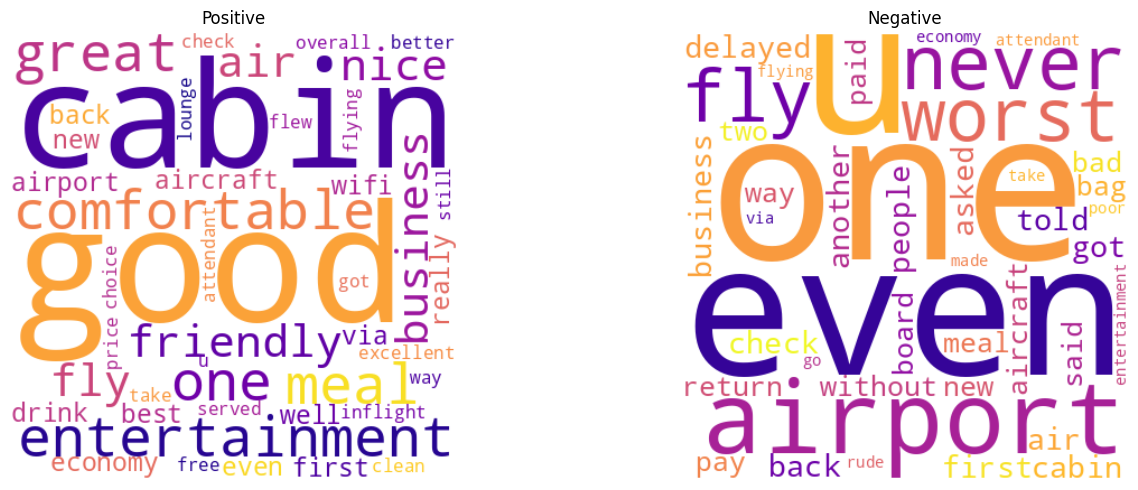

In [98]:
groups = df_top_word['vader_sentiment'].unique()

# Set up the plot
fig, axes = plt.subplots(1, len(groups), figsize=(15, 5), squeeze=False)

# Generate word clouds for each group
for idx, group in enumerate(groups):
    text = " ".join(df_top_word[ df_top_word['vader_sentiment'] == group]['token'])
    wordcloud = WordCloud(width=400, height=400,
                          background_color='white',
                          colormap = 'plasma'
                          ).generate(text)

    # Display the word cloud
    axes[0, idx].imshow(wordcloud, interpolation='bilinear')
    axes[0, idx].set_title(f"{group}")
    axes[0, idx].axis('off')

plt.tight_layout()
plt.show()

# Tokenize with Bi-gram

In [99]:
from nltk.util import bigrams

def clean_tokenize_bigram(x):
  # lower text
  out_text = x.lower()
  # clean double whitespace
  out_text = ' '.join(out_text.split())
  # clean url
  out_text = re.sub(r"http\S+|www\S+|https\S+", 'http', out_text)
  # clean username
  out_text = re.sub(r"@\S+", '@user', out_text)
  # remove punctuation
  out_text = out_text.translate(str.maketrans('', '', string.punctuation))
  # fix word contraction: don't -> do not
  out_text = contractions.fix(out_text)
  # tokenize the text
  tokens = word_tokenize(out_text)
  # exclude stop words
  tokens = [word for word in tokens if word not in stop_words]
  # lematize tokens: cats -> cat
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  # exclude custom words
  tokens = [word for word in tokens if word not in custom_word]

  # Create bigrams
  tokens = list(bigrams(tokens))

  # Join bigrams into single strings
  tokens = ['_'.join(pair) for pair in tokens]

  return(tokens)

clean_tokenize_bigram("I love this apple")


['love_apple']

In [100]:
%%time
df_review_token = df_review_clean[['Id_survey', 'vader_sentiment', 'Review']].copy()

df_review_token['token'] = df_review_token['Review'].apply(clean_tokenize_bigram)

df_review_token = df_review_token.explode('token')

df_review_token = df_review_token[['Id_survey', 'token', 'vader_sentiment']]

df_review_token.head()

CPU times: user 1.55 s, sys: 8.37 ms, total: 1.56 s
Wall time: 1.71 s


,Id_survey,token,vader_sentiment
0,5,bad_rerouted,Negative
0,5,rerouted_cancelled,Negative
0,5,cancelled_last,Negative
0,5,last_weekend,Negative
0,5,weekend_adria,Negative


In [101]:
# Only check for positive and negative sentiment
df_top_word = df_review_token[ df_review_token['vader_sentiment'] != 'Neutral' ]
df_top_word = df_top_word.groupby(['vader_sentiment', 'token']).agg({'Id_survey':'nunique'}).reset_index()

# Get top 50 words
df_top_word = df_top_word.sort_values(['vader_sentiment', 'Id_survey'], ascending = [False, False])
df_top_word = df_top_word.groupby('vader_sentiment').head(50)

df_top_word.head()

,vader_sentiment,token,Id_survey
50794,Positive,inflight_entertainment,59
45056,Positive,entertainment_system,41
45413,Positive,even_though,32
52489,Positive,leg_room,30
58990,Positive,premium_economy,28


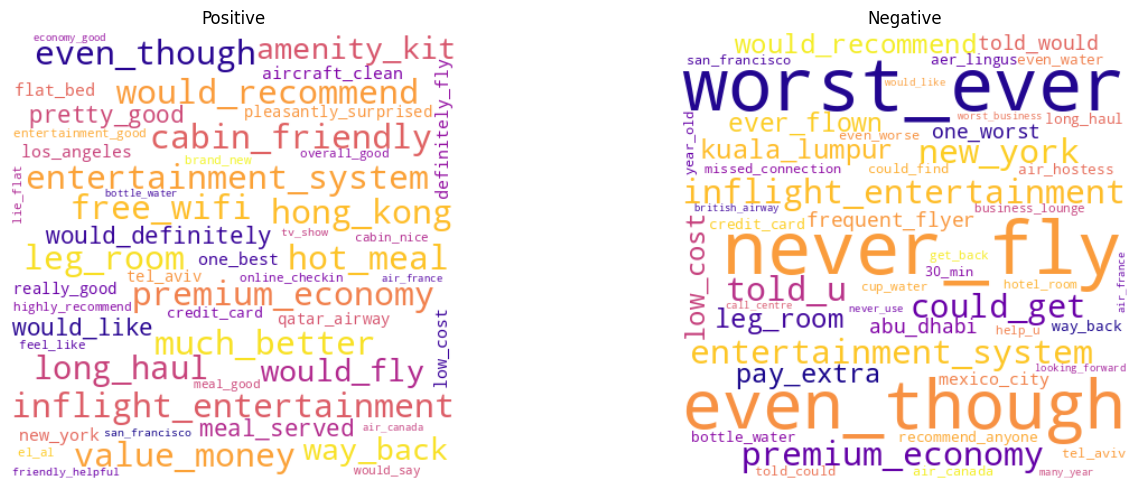

In [102]:
groups = df_top_word['vader_sentiment'].unique()

# Set up the plot
fig, axes = plt.subplots(1, len(groups), figsize=(15, 5), squeeze=False)

# Generate word clouds for each group
for idx, group in enumerate(groups):
    text = " ".join(df_top_word[ df_top_word['vader_sentiment'] == group]['token'])
    wordcloud = WordCloud(width=400, height=400,
                          background_color='white',
                          colormap = 'plasma'
                          ).generate(text)

    # Display the word cloud
    axes[0, idx].imshow(wordcloud, interpolation='bilinear')
    axes[0, idx].set_title(f"{group}")
    axes[0, idx].axis('off')

plt.tight_layout()
plt.show()